# Импортируем библиотеки `"pandas"` (библиотека для обработки и анализа данных), `"matmlotlib"` (низкоуровневая библиотека для построения графиков на `Python`, которая служит в качестве утилиты визуализации), а именно модуль `.pyplot` (модуль в пакете Matplotlib) и `NumPy` - это библиотека Python, которую применяют для математических вычислений: начиная с базовых функций и заканчивая линейной алгеброй.
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Снимаем ограничение на количество отображаемых колонок.
---

In [3]:
pd.set_option("display.max_columns", None)

# Убираем научную `(scientific)` нотацию в выводе чисел в `pandas` глобально
---

In [4]:
# # Устанавливаем глобальную настройку отображения чисел с плавающей точкой (float)
# это имя параметра настройки – отвечает за формат отображения float-чисел
# "display.float_format" - это имя параметра настройки – отвечает за формат отображения float-чисел
# Задаём формат: число будет отображаться с двумя знаками после запятой
# {:.2f} означает: форматировать число как float (f), с 2 десятичными знаками (.2)
# .format — метод форматирования, применяется ко всем float в DataFrame/Series
pd.set_option('display.float_format', '{:.2f}'.format)

# Загрузка `Excel`-файла в объект `DataFrame`.
# Метод `pd.read_excel` считывает данные из файла `Excel` (формата `.xlsx`, `.xls`) и загружает в таблицу.
---

In [5]:
df_deposits = pd.read_excel("ds_deposits.xlsx")

# Перед анализом данных, очень важно выполнить этап предварительной обработки и очистки данных **(data cleaning & preprocessing)**. Это фундаментальный шаг, обеспечивающий корректность последующего анализа и визуализации.
---

## Универсальный чек-лист для анализа данных. ✅ -означает: этот шаг нужен для исполнения  ❌ - означает: этот шаг ненужен для исполнения:
| Шаг | Действие | Примечание |
| ----------- | ----------- | ----------- |
| 1. Загрузка данных. | Загрузить данные и предварительно просмотреть структуру (`head()`, `info()`, `tail()`). | ✅ Убедитесь, что данные корректно считались. |
| 2. Очистка названий столбцов. | Удалить лишние пробелы, привести к единому стилю (`snake_case`, `lowercase`). | ❌ Например: `Product Name → product_name`. |
| 3. Проверка и удаление дубликатов. | Удалить повторяющиеся строки, если они не несут ценности. | ❌`df.drop_duplicates()` |
| 4. Обработка пропусков `(NaN)`. | Определить долю пропущенных значений и решить: удалить или заменить. | ✅ Используйте `isna().sum()` и визуализацию (например, `missingno`). |
| 5. Приведение типов данных. | Убедиться, что числовые, категориальные и временные переменные имеют правильные типы (`int`, `float`, `category`, `datetime`). | ❌ Ошибки типов — частая причина искажения анализа. |
| 6. Обработка строковых колонок. | Удалить лишние пробелы, привести к одному регистру, унифицировать формат. | ❌ Например: " USA " → "usa" |
| 7. Обработка категориальных признаков. | Проверить уникальные значения, унифицировать категории, заменить пропуски. | ❌ Например: "M", "Male", "male" → "Male" |
| 8. Обработка числовых колонок. | Заменить пропуски на медиану/среднее/0. Проверить на выбросы и отрицательные значения (если не допустимы). | ❌ Визуализируйте с `boxplot`, `histogram`. |
| 9. Работа с датами. | Преобразовать в `datetime`, выделить год, месяц и т.п. | ❌ `pd.to_datetime()` и `df['date'].dt.year` |
| 10. Добавление новых переменных. | При необходимости — создать расчетные поля (например, `total`, `duration`, `is_weekend`). | ❌ Это улучшит качество анализа. |
| 11. Проверка на логику и ошибки. | Убедиться, что данные согласованы: например, `start_date <= end_date`. | ❌ Важно для временных и количественных данных. |
| 12. Сохранение очищенных данных. | Сохранить подготовленный файл в новый `CSV/Excel`. | ❌ Чтобы не терять прогресс очистки. |
---

In [6]:
# Отображаем первые 5 строк датафрейма
df_deposits.head()

,REPORT_DATE,CLIENTID,CURRENCY,PRODUCT_OF_DEPOSIT,BALANCE,PREV_BALANCE
0,2023-10-30,3802103218,UZS,% каждый день на Visa,193000000.00,0.00
1,2023-10-30,1325361413,UZS,% каждый день на Visa,53000000.00,0.00
2,2023-10-30,2635323882,UZS,% каждый день на Visa,1225000.00,0.00
3,2023-10-30,3884573406,UZS,% каждый день на Visa,5500000.00,0.00
4,2023-10-30,3578059363,UZS,% каждый день на Visa,4000000.00,0.00


In [7]:
# Отображаем последние 5 строк датафрейма
df_deposits.tail()

,REPORT_DATE,CLIENTID,CURRENCY,PRODUCT_OF_DEPOSIT,BALANCE,PREV_BALANCE
26060,2023-10-31,3035877158,UZS,% каждый день на Visa,343104676.00,342898371.00
26061,2023-10-31,4078421678,UZS,% каждый день на Visa,72864704.01,70469219.01
26062,2023-10-31,2957559643,UZS,% каждый день на счет,1005781.00,1005204.00
26063,2023-10-31,4164667437,UZS,% каждый день на Visa,76600320.00,78000320.00
26064,2023-10-31,3855151691,UZS,% каждый день на Visa,13843925.00,13963925.00


In [8]:
# Функция info() показывает информацию о DataFrame
# Включая типы данных и использование памяти
# memory_usage = "deep" позволяет получить более точную информацию о потреблении памяти
# Важно отметить, что использование memory_usage = "deep" может занять больше времени, так как оно требует дополнительного анализа
df_deposits.info(memory_usage = "deep")

# Все данные имеют соответствующие типы. Приведение данных не требуется.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26065 entries, 0 to 26064
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   REPORT_DATE         26065 non-null  datetime64[ns]
 1   CLIENTID            26065 non-null  int64         
 2   CURRENCY            26065 non-null  object        
 3   PRODUCT_OF_DEPOSIT  26065 non-null  object        
 4   BALANCE             26065 non-null  float64       
 5   PREV_BALANCE        26065 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.7 MB


In [9]:
# Подсчитываем общую сумму всех пропущенных значений в каждом столбце
print(df_deposits.isna().sum())

# В статическом формате все данные заполнены. Дальнейших манипуляций не требуется.

REPORT_DATE           0
CLIENTID              0
CURRENCY              0
PRODUCT_OF_DEPOSIT    0
BALANCE               0
PREV_BALANCE          0
dtype: int64


## **ЗАДАЧА 1: АНАЛИЗ ДИНАМИКИ СУММ ДЕПОЗИТОВ ПО ВАЛЮТАМ И ПРОДУКТАМ**
### Построй графики динамики сумм всех депозитов по датам для каждой валюты и каждого продукта. Для этого:
### • Сгруппируй данные по дате `(REPORT_DATE)`, валюте `(CURRENCY)` и продукту депозита `(PRODUCT_OF_DEPOSIT)`.
### • Вычисли сумму остатков `(BALANCE)` для каждой комбинации.
### • Построй отдельные графики для каждой комбинации валюты и продукта, показывая, как изменялась сумма депозитов с течением времени.
---

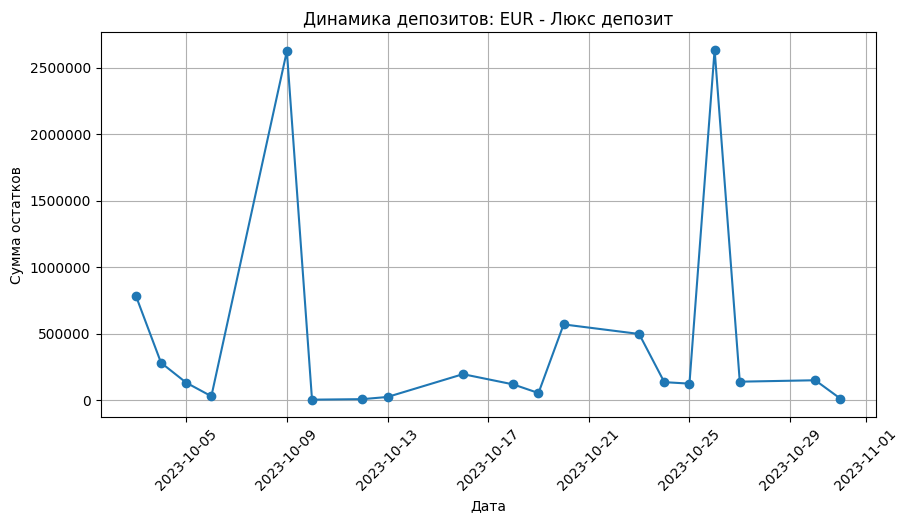

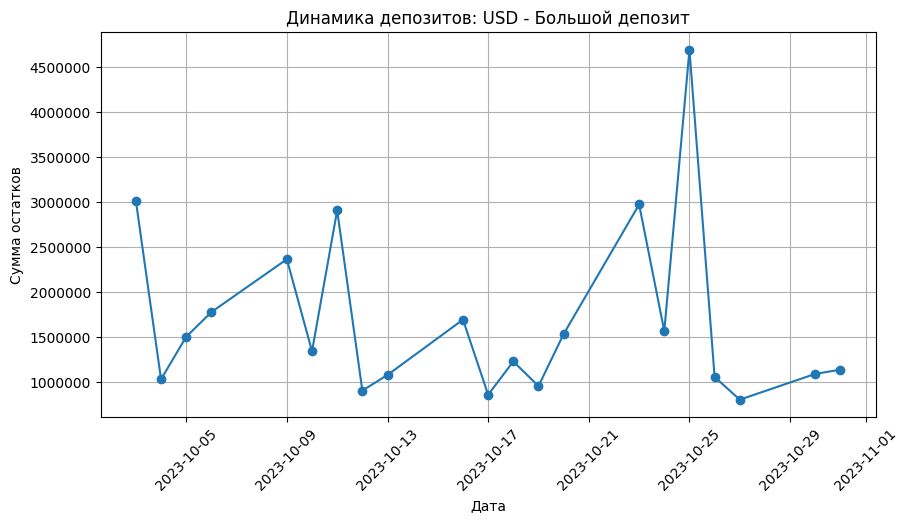

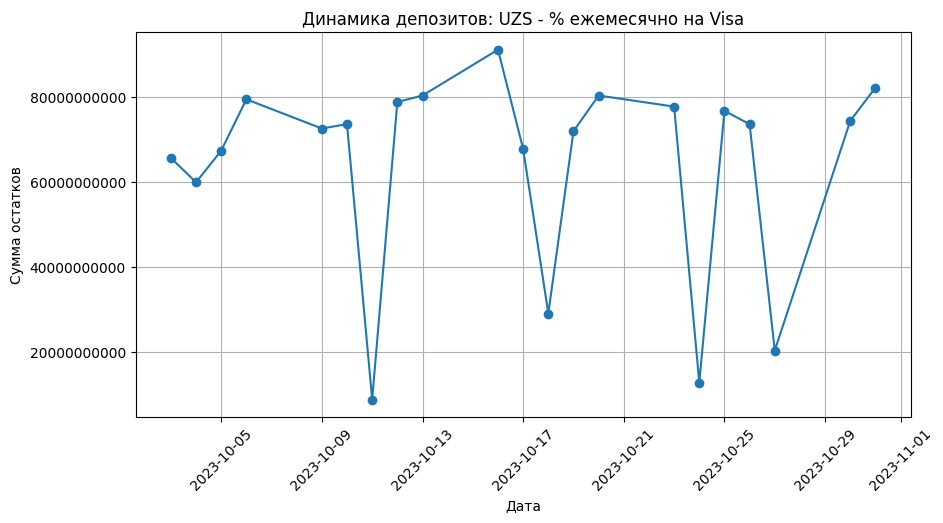

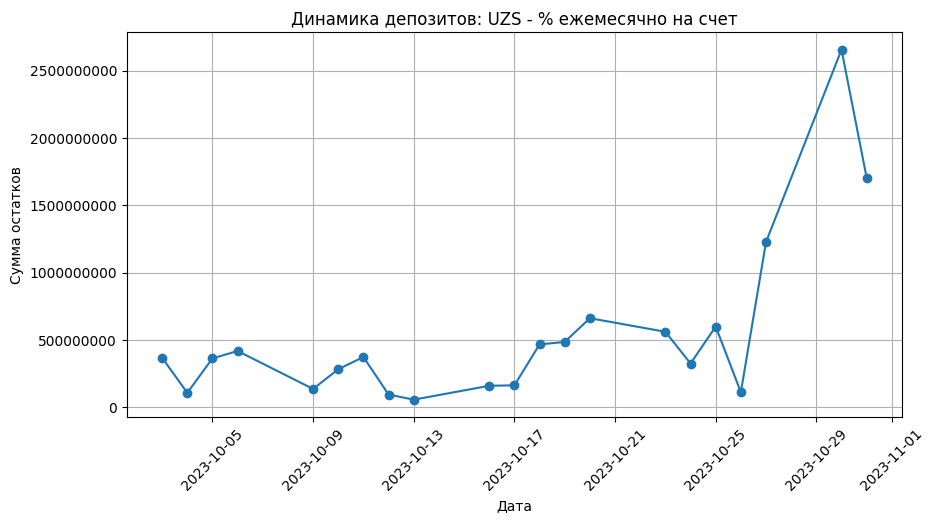

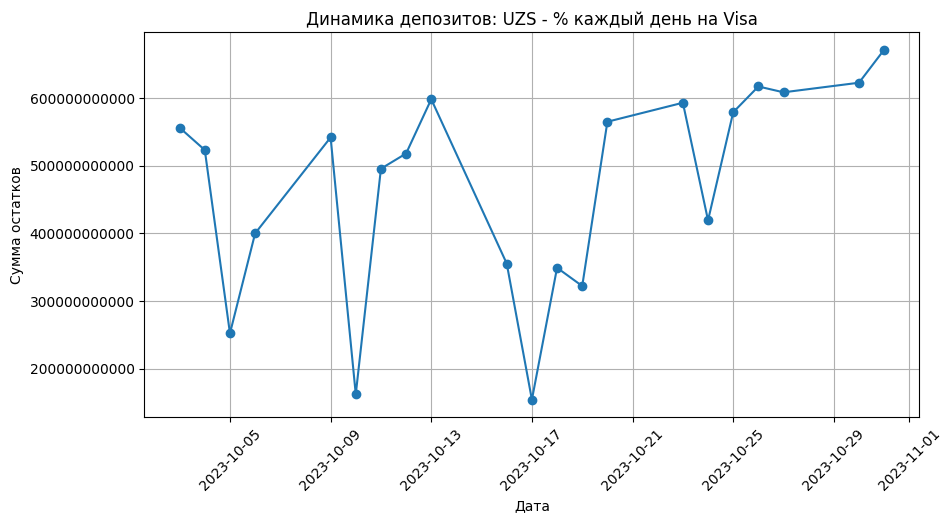

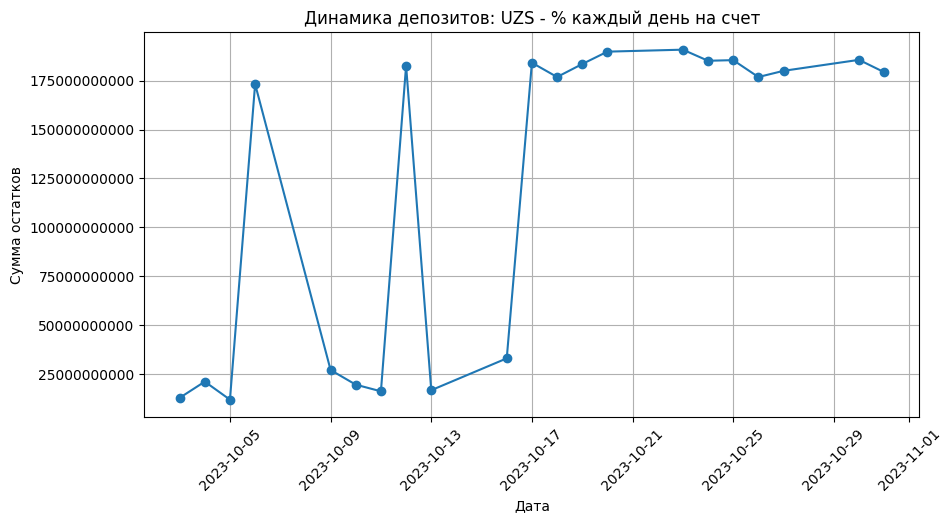

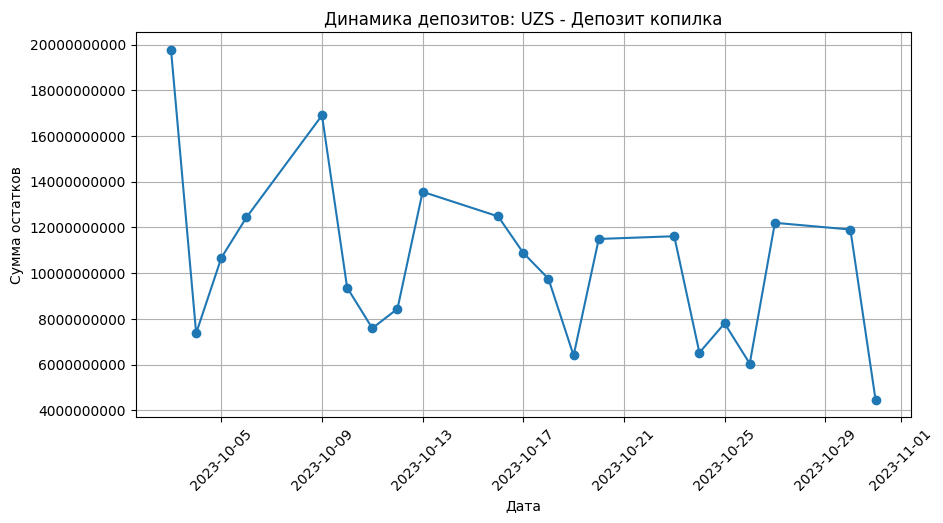

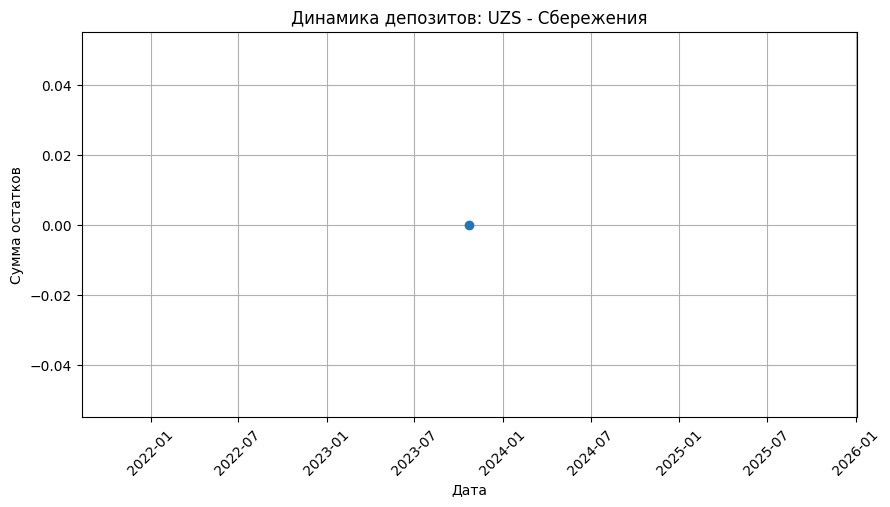

In [10]:
# Сгруппировываем данные по дате (REPORT_DATE), валюте (CURRENCY) и продукту депозита (PRODUCT_OF_DEPOSIT)
# и вычисляем сумму остатков (BALANCE) для каждой комбинации.
# 1. Группировка и суммирование по дате, валюте и продукту
df_sum = (
    df_deposits
    .groupby(["REPORT_DATE", "CURRENCY", "PRODUCT_OF_DEPOSIT"])["BALANCE"]
    .sum()
    .reset_index()
)

# Построение графиков
# Перебираем каждую уникальную комбинацию валюты и продукта депозита
# group — это подтаблица с соответствующими значениями
for (currency, product), group in df_sum.groupby(['CURRENCY', 'PRODUCT_OF_DEPOSIT']):
    # Создаём новый график размером 10x5 дюйма
    plt.figure(figsize=(10, 5))

    # Строим линию: по оси X — дата отчёта (REPORT_DATE), по оси Y — сумма остатков (BALANCE)
    plt.plot(group['REPORT_DATE'], group['BALANCE'], marker='o', linestyle='-')

    # Заголовок графика с указанием валюты и продукта
    plt.title(f"Динамика депозитов: {currency} - {product}")

    # Название оси X — Дата
    plt.xlabel("Дата")

    # Название оси Y — Сумма остатков
    plt.ylabel("Сумма остатков")

    # Добавляем сетку на график для удобства восприятия графиков
    plt.grid(True)

    # Поворачиваем метки по оси X на 45 градусов для лучшей читаемости дат
    plt.xticks(rotation=45)

    plt.ticklabel_format(style='plain', axis='y')  # отключает scientific notation для оси Y

    # Показываем графики
    plt.show()

## **ЗАДАЧА 2: АНАЛИЗ ДАННЫХ ПО ВАЛЮТЕ `UZS`**
### • Отфильтруй датасет, выбрав только записи с валютой `UZS`.
### • Сгруппируй данные по продуктам `(PRODUCT_OF_DEPOSIT)`, и выбери топ-1 продукт по сумме остатков `(BALANCE)`.
### • Для выбранного продукта:
### • Построй график, показывающий динамику среднего `(mean)` и медианы `(median)` остатков по датам.
### • Проанализируй, есть ли различия между средней и медианной суммой остатков.
### Подумай и опиши: почему такие различия могут возникать.
---

Топ-1 продукт в UZS: % каждый день на Visa


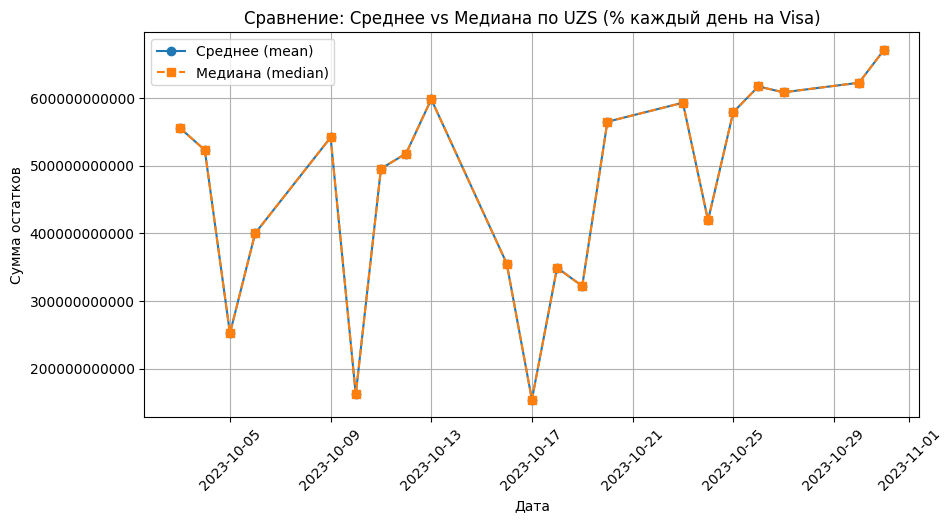

count              1.00
mean    597976599341.69
std                 NaN
min     597976599341.69
25%     597976599341.69
50%     597976599341.69
75%     597976599341.69
max     597976599341.69
Name: BALANCE, dtype: float64

In [11]:
# 1. Отфильтровать только валюту UZS
df_uzs = df_sum[df_sum["CURRENCY"] == "UZS"]

# 2. Найти топ-1 продукт по сумме балансов
top_product = (
    df_uzs.groupby("PRODUCT_OF_DEPOSIT")["BALANCE"]
    .sum()
    .sort_values(ascending = False)
    .idxmax()
)

print(f"Топ-1 продукт в UZS: {top_product}")

# 3. Фильтруем данные только по этому продукту
df_top = df_uzs[df_uzs['PRODUCT_OF_DEPOSIT'] == top_product]

# 4. Группируем по дате и считаем среднее и медиану
df_stats = (
    df_top.groupby("REPORT_DATE")["BALANCE"]
    .agg(["mean", "median"])
    .reset_index()
)

# Построение графикa
plt.figure(figsize = (10, 5))
plt.plot(df_stats["REPORT_DATE"], df_stats["mean"], marker = "o", label = "Среднее (mean)")
plt.plot(df_stats["REPORT_DATE"], df_stats["median"], marker = "s", label = "Медиана (median)", linestyle = "--")
plt.title(f"Сравнение: Среднее vs Медиана по UZS ({top_product})")
plt.xlabel("Дата")
plt.ylabel("Сумма остатков")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.ticklabel_format(style="plain", axis="y")
plt.show()

"""
    1. Cреднее и медиана совпадают - это нормальное поведение, которое говорит о сбалансированных данных.
    Если в каждый день большинство клиентов имели похожие суммы депозитов, и нет резко больших значений, то:
        среднее ≈ медиане.
    2. Если в у нас датасете, например, в день всего 5–10 клиентов:
    то распределение может быть почти симметричным (пример: [4 млн, 5 млн, 5 млн, 6 млн, 5 млн]);
        тогда среднее и медиана будут одинаковыми.
"""

# Проверка распределения значений по любому дню:
df_top[df_top['REPORT_DATE'] == '2023-10-13']['BALANCE'].describe()

## **ЗАДАЧА 3: РАБОТА С РЕАЛЬНЫМИ ДАННЫМИ — ТОП-5 КЛИЕНТОВ**
### • Отфильтруй датасет, чтобы выбрать только тех клиентов, у которых не нулевые остатки на депозитах `(BALANCE > 0)`.
### • Определи топ-5 клиентов по максимальной сумме остатка на депозитах.
### • Для этих клиентов:
### • Построй графики изменений остатков на депозитах с течением времени.
### • Проанализируй, какие тренды наблюдаются для этих клиентов.
---

### **Подсказка**: Не забывай использовать методы группировки, фильтрации и визуализации данных, которые мы обсуждали на лекциях. Результаты визуализаций помогут тебе лучше понять, как распределены и изменяются данные по депозитам, а также выявить ключевые тренды и особенности.
---

Топ-5 клиентов по максимальному остатку: [1452571626, 759993059, 3996092843, 2213265453, 3723622566]


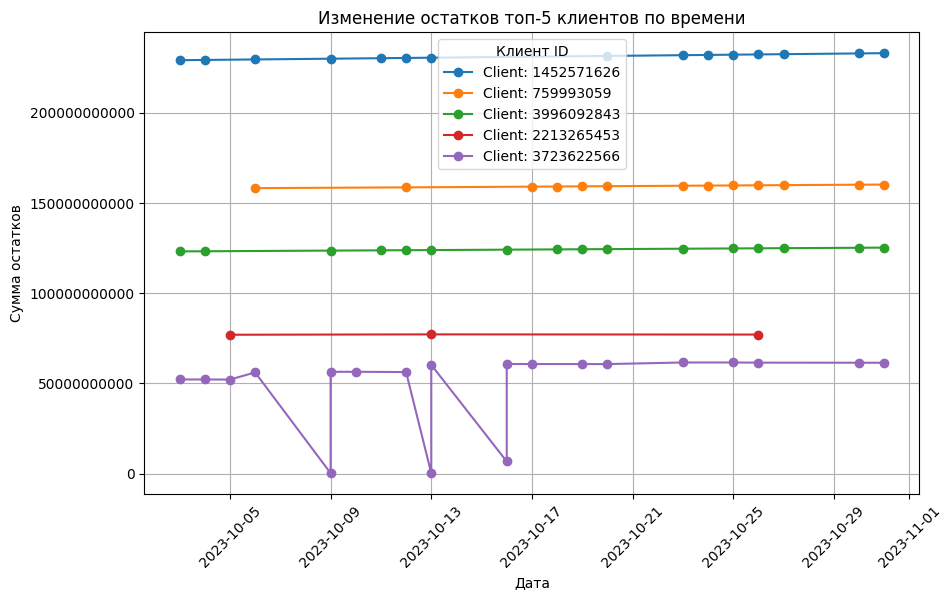

In [31]:
# 1. Фильтрация клиентов с ненулевыми остатками
df_nonzero = df_deposits[df_deposits["BALANCE"] > 0]

# 2. Определение топ-5 клиентов по максимальному балансу
top_clients = (
    df_nonzero.groupby("CLIENTID")["BALANCE"]
    .max()
    .sort_values(ascending = False)
    .head(5)
    .index
)

print("Топ-5 клиентов по максимальному остатку:", list(top_clients))

# 3. Фильтрация данных только по этим клиентам
df_top_clients = df_nonzero[df_nonzero["CLIENTID"].isin(top_clients)]

# 4. Построение графиков по каждому клиенту
plt.figure(figsize=(10, 6))

for client_id in top_clients:
    client_data = df_top_clients[df_top_clients["CLIENTID"] == client_id].sort_values(by="REPORT_DATE")
    plt.plot(client_data["REPORT_DATE"], client_data['BALANCE'], marker='o', label=f'Client: {client_id}')

# Настройки графика
plt.title("Изменение остатков топ-5 клиентов по времени")
plt.xlabel("Дата")
plt.ylabel("Сумма остатков")
plt.legend(title="Клиент ID")
plt.grid(True)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Топ 4 клиента равномерно инвестировали в определенные промежутки времени, 
# а последний клиент нет. У последнего клиента в графике наблюдаются резкие скачки функции в Декартовой системе координат.